In [1]:
import pandas as pd
from SALib.analyze import sobol
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of cut-offs

Some cut-offs were impossed to allow the usage of sparse matrices. We will measure now how different results they generate.

In [25]:
Y = []

with open('/home/bcz/research/fga2022/si/epsilon/determinist.json') as f:
    determinist_parameters = json.load(f)
    

for i in range(32):
    
    tmp = pd.read_csv(
        f'/home/bcz/research/fga2022/si/epsilon/determinist_{i:06d}/timeSeriesStatistics_P0.csv',
        names=[
            'crop', 'time', 'exposition', 'infective',
            'infective_ac', 'alive', 'inoculum', 'coinfected',
            'sim'
        ]
    )
    tmp['level'] = i
    tmp['epsilon'] = determinist_parameters[i]['global_parameters']['epsilon_beta']
    Y += [tmp]

ts_by_epsdet = pd.concat(Y)
ts_by_epsdet.reset_index(level=0, inplace=True)

In [26]:
ts_by_epsdet_g = ts_by_epsdet.groupby(['crop', 'time', 'level'], as_index=False).mean()

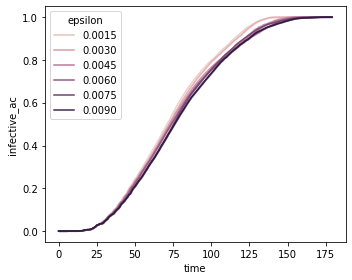

In [31]:
fig, ax = plt.subplots(1)
sns.lineplot(x='time', y='infective_ac', hue='epsilon', data=ts_by_epsdet_g.query('crop == 0'), ax=ax)
fig.set_size_inches(5, 4)
fig.tight_layout()
plt.savefig('figures/epsilon_beta_p0.png', dpi=300)
plt.show()

In [36]:
Y = []

with open('/home/bcz/research/fga2022/si/epsilon/stochastic.json') as f:
    determinist_parameters = json.load(f)
    

for i in range(32):
    
    tmp = pd.read_csv(
        f'/home/bcz/research/fga2022/si/epsilon/stochastic_{i:06d}/timeSeriesStatistics_P0.csv',
        names=[
            'crop', 'time', 'exposition', 'infective',
            'infective_ac', 'alive', 'inoculum', 'coinfected',
            'sim'
        ]
    )
    tmp['level'] = i
    tmp['epsilon'] = determinist_parameters[i]['global_parameters']['epsilon_alpha']
    Y += [tmp]

tmp = pd.read_csv(
    '/home/bcz/research/fga2022/si/epsilon/stochastic_baseline/timeSeriesStatistics_P0.csv',
    names=[
        'crop', 'time', 'exposition', 'infective',
        'infective_ac', 'alive', 'inoculum', 'coinfected',
        'sim'
    ]
)
tmp['level'] = 32
tmp['epsilon'] = 0.0
Y += [tmp]


ts_by_epsstch = pd.concat(Y)
ts_by_epsstch.reset_index(level=0, inplace=True)
ts_by_epsstch_g = ts_by_epsstch.groupby(['crop', 'time', 'level'], as_index=False).mean()

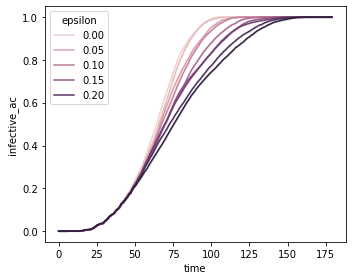

In [37]:
fig, ax = plt.subplots(1)
sns.lineplot(x='time', y='infective_ac', hue='epsilon', data=ts_by_epsstch_g.query('crop == 0'), ax=ax)
fig.set_size_inches(5, 4)
fig.tight_layout()
plt.savefig('figures/epsilon_alpha_p0.png', dpi=300)
plt.show()

In [10]:
with open('../../../si/si_transmission/problem.json') as f:
    si_transmission_problem = json.load(f)
si_transmission_problem

{'num_vars': 3,
 'names': ['k_beta', 'k_alpha', 'c'],
 'bounds': [[0.0, 1.25], [0.0, 1.25], [0.0, 0.001]],
 'dists': ['unif', 'unif', 'unif']}

In [19]:
Y = np.zeros(1024)
for i in range(1024):

    tmp = pd.read_csv(
        f'../../../si/si_transmission/si_transmission_{i:06d}/timeSeriesStatistics_P0.csv',
        names=[
            'crop', 'time', 'exposition', 'infective',
            'infective_ac', 'alive', 'inoculum', 'coinfected',
            'sim'
        ]
    )
    tmp = tmp.groupby(['crop', 'time']).mean()
    Y[i] = tmp['infective_ac'].values[-1].mean()
    

In [23]:
Si = sobol.analyze(problem=si_transmission_problem, Y=Y)

In [24]:
Si

{'S1': array([0.8445963 , 0.02369125, 0.01060724]),
 'S1_conf': array([0.28874606, 0.07272415, 0.02061858]),
 'ST': array([9.26593152e-01, 1.45640393e-01, 8.59553131e-04]),
 'ST_conf': array([0.22373868, 0.13446214, 0.00153087]),
 'S2': array([[        nan,  0.11931558, -0.00914619],
        [        nan,         nan,  0.03233652],
        [        nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.50290195, 0.50069434],
        [       nan,        nan, 0.10470013],
        [       nan,        nan,        nan]])}

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

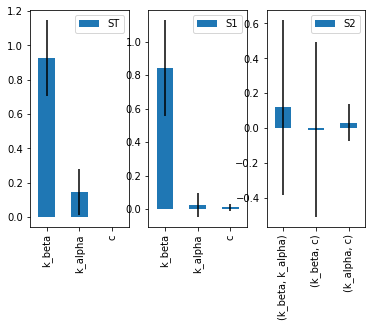

In [25]:
Si.plot()

In [2]:
with open('../../../si/r_guesses/problem.json') as f:
    guesses_problem = json.load(f)
guesses_problem

{'num_vars': 4,
 'names': ['k_beta', 'k_alpha', 'c', 'dpi'],
 'bounds': [[0.1, 2.5], [0.1, 2.5], [0.0, 0.001], [1, 15]],
 'dists': ['unif', 'unif', 'unif', 'unif']}

In [7]:
YP0 = np.zeros(1280)
YP12 = np.zeros(1280)
YP123 = np.zeros(1280)
for i in range(1280):
    for patho, Y in zip(['P0', 'P12', 'P123'], [YP0, YP12, YP123]):
        tmp = pd.read_csv(
            f'../../../si/r_guesses/r_guess_{i:06d}/timeSeriesStatistics_{patho}.csv',
            names=[
                'crop', 'time', 'exposition', 'infective',
                'infective_ac', 'alive', 'inoculum', 'coinfected',
                'sim'
            ]
        )
        tmp = tmp.query('crop == 0')
        tmp = tmp.groupby(['crop', 'time']).mean()
        Y[i] = tmp['infective_ac'].values[-1].mean()
    

<AxesSubplot:xlabel='crop,time'>

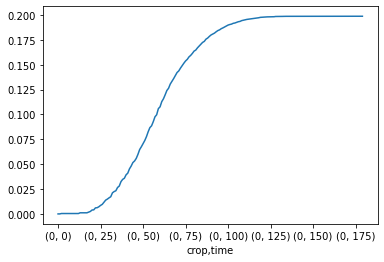

In [8]:
tmp.infective_ac.plot()

(array([ 50.,  48.,  57.,  53.,  69.,  77., 190., 226., 186., 324.]),
 array([0.14144 , 0.227296, 0.313152, 0.399008, 0.484864, 0.57072 ,
        0.656576, 0.742432, 0.828288, 0.914144, 1.      ]),
 <BarContainer object of 10 artists>)

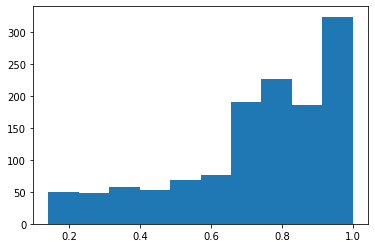

In [9]:
# plt.hist(YP0)
plt.hist(YP0)

In [10]:
Si_P0 = sobol.analyze(problem=guesses_problem, Y=YP0)
Si_P12 = sobol.analyze(problem=guesses_problem, Y=YP12)
Si_P12P0 = sobol.analyze(problem=guesses_problem, Y=YP12/(YP0+1e-22))
Si_P0

{'S1': array([ 0.4707795 ,  0.01394511, -0.00597795,  0.41651678]),
 'S1_conf': array([0.15366467, 0.02839999, 0.0147173 , 0.15757675]),
 'ST': array([0.61981461, 0.04786581, 0.00193896, 0.50227759]),
 'ST_conf': array([0.15180009, 0.07151589, 0.00210511, 0.14610499]),
 'S2': array([[        nan,  0.03281632, -0.00384154,  0.05236405],
        [        nan,         nan, -0.01225304,  0.01469061],
        [        nan,         nan,         nan,  0.02134946],
        [        nan,         nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.24450114, 0.24724091, 0.2729652 ],
        [       nan,        nan, 0.06745926, 0.05131263],
        [       nan,        nan,        nan, 0.02822106],
        [       nan,        nan,        nan,        nan]])}

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

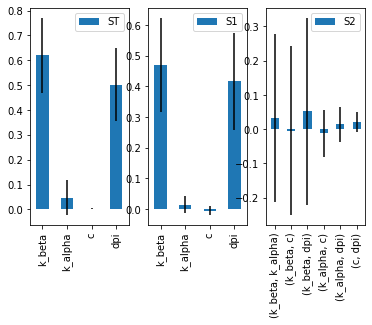

In [11]:
Si_P0.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

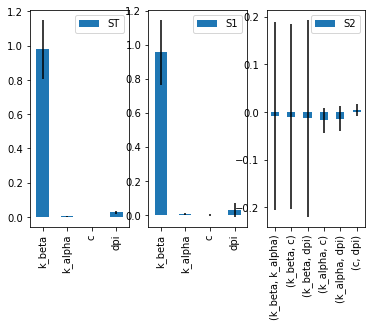

In [12]:
Si_P12.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

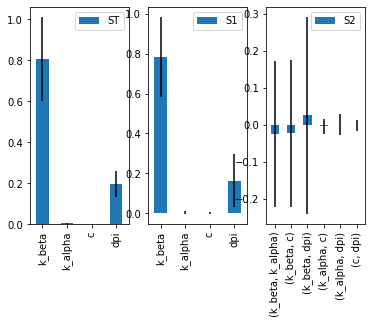

In [34]:
Si_P12P0.plot()

Text(0, 0.5, 'Sobol Total Index')

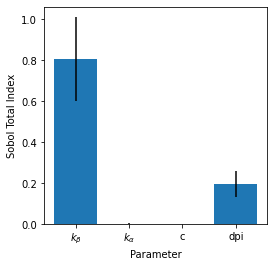

In [46]:
fig, ax = plt.subplots(1)
fig.set_size_inches(4,4)
ax.bar(x=[
        r'$k_\beta$', r'$k_\alpha$', 'c', 'dpi'
    ], 
    height=Si_P12P0['ST'], yerr=Si_P12P0['ST_conf'],
    color=''
)
ax.set_xlabel('Parameter')
ax.set_ylabel('Sobol Total Index')

In [42]:
Si_P12P0

{'S1': array([0.78352887, 0.00355553, 0.00097073, 0.1622206 ]),
 'S1_conf': array([0.20222966, 0.00873771, 0.00614143, 0.13248446]),
 'ST': array([8.05409672e-01, 3.54742608e-03, 8.03330083e-04, 1.95801592e-01]),
 'ST_conf': array([0.2042098 , 0.00345582, 0.00075344, 0.06439334]),
 'S2': array([[            nan, -2.52188475e-02, -2.29866099e-02,
          2.51959724e-02],
        [            nan,             nan, -4.29023690e-03,
         -8.81173553e-05],
        [            nan,             nan,             nan,
         -2.00202499e-03],
        [            nan,             nan,             nan,
                     nan]]),
 'S2_conf': array([[       nan, 0.19829565, 0.19966323, 0.26766832],
        [       nan,        nan, 0.01997402, 0.02806144],
        [       nan,        nan,        nan, 0.01552742],
        [       nan,        nan,        nan,        nan]])}

(array([ 45.,  73.,  88., 174., 283., 107., 127., 157., 139.,  87.]),
 array([0.18871525, 0.27904372, 0.3693722 , 0.45970067, 0.55002915,
        0.64035762, 0.7306861 , 0.82101457, 0.91134305, 1.00167152,
        1.092     ]),
 <BarContainer object of 10 artists>)

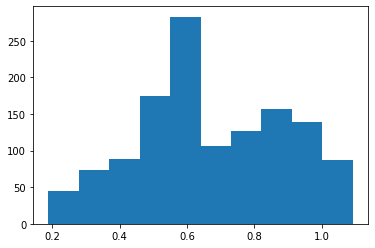

In [14]:
plt.hist(YP12/(YP0+1e-22))

<AxesSubplot:xlabel='day'>

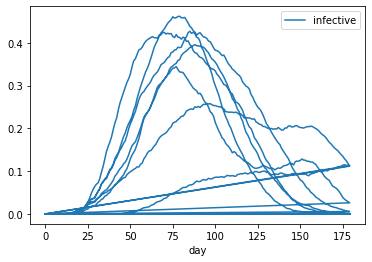

In [28]:
pd.read_csv(
    '../../../si/r_guesses/trial/timeSeriesStatistics_P0.csv',
    names=['season', 'day', 'infected', 'infective', 'a', 'b', 'c', 'd', 'e'],
).plot('day', 'infective')

<AxesSubplot:xlabel='day'>

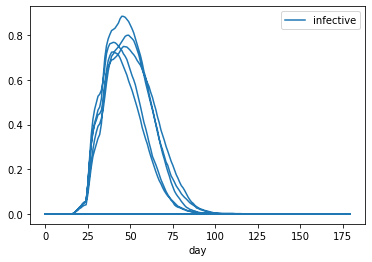

In [39]:
pd.read_csv(
    '../../../si/r_guesses/test/timeSeriesStatistics_P12.csv',
    names=['season', 'day', 'infected', 'infective', 'a', 'b', 'c', 'd', 'e'],
).plot('day', 'infective')

In [16]:
from SALib.sample import saltelli

In [20]:
X = saltelli.sample(guesses_problem, 128)

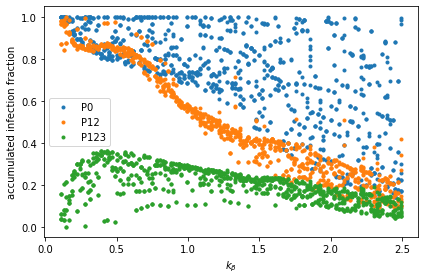

In [51]:
fig, ax = plt.subplots(1, facecolor='white')
ax.scatter(X[:, 0], YP0, label='P0', marker='.')
ax.scatter(X[:, 0], YP12, label='P12', marker='.')
ax.scatter(X[:, 0], YP123, label='P123', marker='.')
ax.legend()
ax.set_xlabel(r'$k_{\beta}$')
ax.set_ylabel('accumulated infection fraction')
fig.tight_layout()
plt.show()

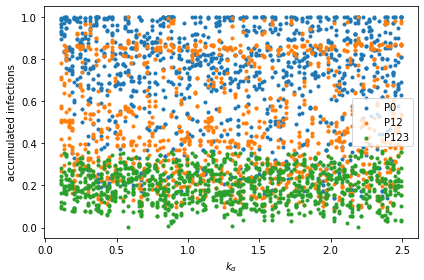

In [29]:
fig, ax = plt.subplots(1)
ax.scatter(X[:, 1], YP0, label='P0', marker='.')
ax.scatter(X[:, 1], YP12, label='P12', marker='.')
ax.scatter(X[:, 1], YP123, label='P123', marker='.')
ax.legend()
ax.set_xlabel(r'$k_{\alpha}$')
ax.set_ylabel('accumulated infections')
fig.tight_layout()

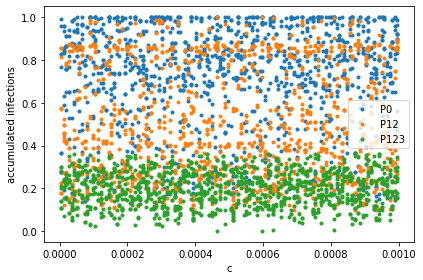

In [31]:
fig, ax = plt.subplots(1)
ax.scatter(X[:, 2], YP0, label='P0', marker='.')
ax.scatter(X[:, 2], YP12, label='P12', marker='.')
ax.scatter(X[:, 2], YP123, label='P123', marker='.')
ax.legend()
ax.set_xlabel(r'c')
ax.set_ylabel('accumulated infections')
fig.tight_layout()

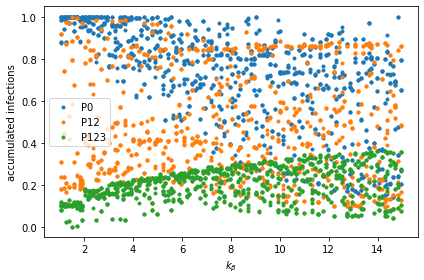

In [52]:
fig, ax = plt.subplots(1, facecolor='white')
ax.scatter(X[:, 3], YP0, label='P0', marker='.')
ax.scatter(X[:, 3], YP12, label='P12', marker='.')
ax.scatter(X[:, 3], YP123, label='P123', marker='.')
ax.legend()
ax.set_xlabel(r'$k_{\beta}$')
ax.set_ylabel('accumulated infections')
fig.tight_layout()

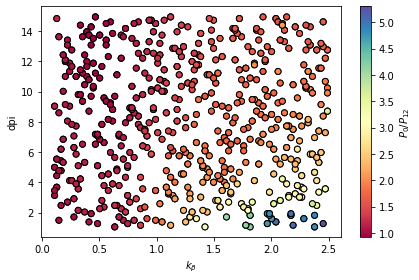

In [62]:
fig, ax = plt.subplots(1, facecolor='white')
cb = ax.scatter(
    X[:,0], X[:, 3], c=YP0/YP12, cmap='Spectral',
    marker='o', edgecolor='black'
)
ax.set_xlabel(r'$k_\beta$')
ax.set_ylabel(r'dpi')
cb = fig.colorbar(cb)
cb.set_label(r'$P_{0}/P_{12}$')
fig.tight_layout()
plt.show()

In [1]:
import json

In [2]:
files_ = [
    'free_parameters_long_term.json',
    'free_parameters.json',
    'inter_competence_parameters.json',
    'competence_parameters.json',
    'resmix.coinf.json',
    'resmix.nocoinf.json',
    'sanity_competence_parameters.json',
    'sanity_parameters.json',
]

In [3]:
for file in files_:
    with open(f'../../parameters/{file}') as f:
        u = json.load(f)

    for sim in u:
        sim['global_parameters']['epsilon_alpha'] = 0.01
        sim['metaparameters']['seeds'] = [i for i in range(200)]
        sim['metaparameters']['simulations'] = 200

    with open(f'../../parameters/v2.0/{file}', 'w') as f:
        json.dump(u, f, indent=4, sort_keys=True)
